# Statistika Nejlepich pisnicek Spotify
>Data byla získana z webu kaggle (https://www.kaggle.com/datasets/conorvaneden/best-songs-on-spotify-for-every-year-2000-2023).<br>
### Popis dat:<br>
- __Best Songs on Spotify from 1996-2023:__<br>
tabulka s nasledujícími sloupci: <br>
title,artist,top genre,year,bpm,energy,danceability ,dB,liveness,valence,duration,acousticness,speechiness ,popularity,,
<br>

    

In [127]:
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install plotly
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install scikit-learn


import numpy
import plotly
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\notes.ipynb
.\Songs.csv
.\.git\COMMIT_EDITMSG
.\.git\config
.\.git\description
.\.git\FETCH_HEAD
.\.git\HEAD
.\.git\index
.\.git\ORIG_HEAD
.\.git\hooks\applypatch-msg.sample
.\.git\hooks\commit-msg.sample
.\.git\hooks\fsmonitor-watchman.sample
.\.git\hooks\post-update.sample
.\.git\hooks\pre-applypatch.sample
.\.git\hooks\pre-commit.sample
.\.git\hooks\pre-merge-commit.sample
.\.git\hooks\pre-push.sample
.\.git\hooks\pre-rebase.sample
.\.git\hooks\pre-receive.sample
.\.git\hooks\prepare-commit-msg.sample
.\.git\hooks\push-to-checkout.sample
.\.git\hooks\update.sample
.\.git\info\exclude
.\.git\logs\HEAD
.\.git\logs\refs\heads\main
.\.git\logs\refs\remotes\origin\main
.\.git\objects\17\ea1a4ce11aa67a022a2317bf7b0056748fc577
.\.git\objects\3a\1b3f5750844858cc0a67eac84ff72bdde821df
.\.git\objects\3e\1a9d0a6be3f1f37c3111ba5d587166f0b4ea42
.\.git\objects\56\b9400e9541984d8bb0a201076c239577ec0ae3
.\.git\objects\62\82db6110370ccbcfb5fb9c4f8758f347d87887
.\.git\objects\70\823a3f86fe2980ecdc7

In [128]:
table = pd.read_csv('.\Songs.csv', delimiter=';')
popularity = pd.read_csv(".\Songs.csv", usecols=['popularity'], delimiter=';')

table.head()

#table.describe()
#print(popularity)
#print(table)
#popularity.describe()


,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


### 1 
Budeme zkoumat, zda delka pisnicek je dobře modelovana normálním rozdělením. <br>
H0 ... <br>
.. <br>

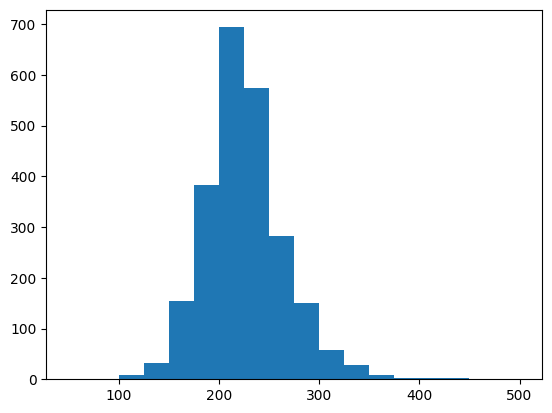

count    2385.000000
mean      225.946751
std        43.226704
min       115.000000
25%       200.000000
50%       221.000000
75%       246.000000
max       688.000000
Name: duration, dtype: float64

In [129]:
duration = table['duration'] #duration in seconds
#print(duration)
#plt.style.use('ggplot')
plt.hist(duration, bins=[50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500], color='tab:blue')
#plt.hist(duration, 20, color='tab:cyan')
#plt.hist(duration, bins=[100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400])
plt.show()
duration.describe()

Ted spocteme prumer, smerodatnou odchulku a rozptyl

In [130]:
duration_mean = duration.mean()
print(duration_mean)
duration_var = duration.var()
print(numpy.var(duration))
print(duration_var)
duration_std = numpy.std(duration)
print("deviation = ", duration_std)

225.946750524109
1867.7644600908015
1868.547918337484
deviation =  43.21764061226389


Vytvorim vektorove intervaly pro delku pisnicek <150, <200, <250, <300 , <350, <400, <450, <500, <550, >=550. (Nove verze <150, <225, <300, <375 , <450, >=450) Spocteme pocet pisnocek pro kazdy interval a pro kazdy interval spocteme z-skore. Z-skore pocitame jako podil, kde v citateli je rozdil horni hranice a prumeru a a ve jmenovateli smerodatna odchylka.

In [131]:
bounds = [120, 180, 240, 300, 360]
sum_bounds = [0, 0, 0, 0, 0, 0]
#sum_bounds[0] = sum(x < bounds[0] for x in duration)
sum_bounds[0] = sum(duration < bounds[0])
#sum_bounds[9] = sum(x >= bounds[8] for x in duration)
sum_bounds[5] = sum(duration >= bounds[4])
for i in range(1, len(bounds)):
    #print(i)
#    sum_bounds[i] = sum(x < bounds[i] for x in duration) - sum(x < bounds[i-1] for x in duration)
    sum_bounds[i] = sum(duration < bounds[i]) - sum(duration < bounds[i-1])

print(sum_bounds)
print(sum(sum_bounds))
z_score = [0, 0, 0, 0, 0, 0]
for i in range(0, len(bounds)):
    z_score[i] = (bounds[i]- duration_mean)/duration_std
print(z_score)
#Ze z skóre spočítám plochu pod křivkou normální distribuce N(0,1)
area_under = [0, 0, 0, 0, 0, 0]
for i in range(len(z_score)):
    #print(i)
    area_under[i] = stats.norm.cdf(z_score[i])
area_under[len(area_under)-1] = 1
print(area_under)

[2, 255, 1408, 614, 90, 16]
2385
[-2.4514700252758463, -1.0631480542015215, 0.32517391687280345, 1.7134958879471283, 3.101817859021453, 0]
[0.007113701783713703, 0.14385740755201204, 0.6274752758867737, 0.9566893253931492, 0.9990383186982759, 1]


Dále spočítám plochu v rámci intervalů

In [132]:
area_inside = [0, 0, 0, 0, 0, 0]
area_inside[0] = round(area_under[0], 8)

for i in range(1, len(area_under)):
    x = area_under[i] - area_under[i-1]
    area_inside[i] = round(x, 8)
    #print(round(area_inside[i]*100, 2))
print(area_inside)
print(sum_bounds)

[0.0071137, 0.13674371, 0.48361787, 0.32921405, 0.04234899, 0.00096168]
[2, 255, 1408, 614, 90, 16]


Plochu v rámci intervalů využiji jako očekávané pravděpodobnosti pro chí-kvadrát test.

In [133]:
sum_elements = sum(sum_bounds)
#print(sum_elements)

#for i in range(len(sum_bounds)):
#    sum_bounds[i] = sum_bounds[i] / sum_elements
#    print(sum_bounds[i])

for i in range(len(area_inside)):
    area_inside[i] = area_inside[i] * sum_elements
    #print(area_inside[i])



chi = 0
#for i in range(len(area_inside)):
 #   print(i)
 #   chi = chi + ((sum_bounds[i] - area_inside[i])^2)/area_inside[i]  
#print(chi)    

stats.chisquare(sum_bounds, f_exp=area_inside)

Power_divergenceResult(statistic=205.3276643003221, pvalue=2.058183074578902e-42)

p-value vysla mensi nez 0.05, takze hypotezu zamitneme

Ještě je možné podívat se na Q-Q plot (quantile - quantile plot)

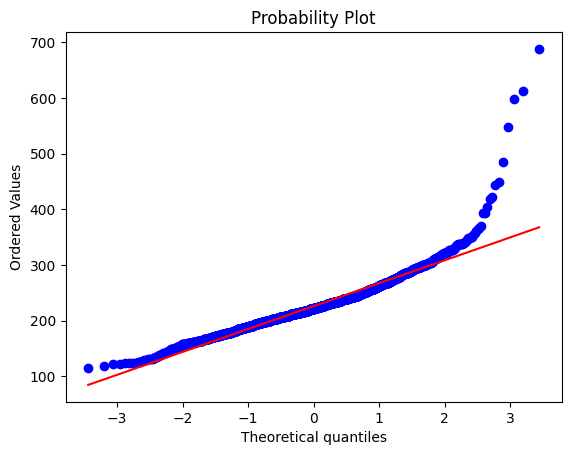

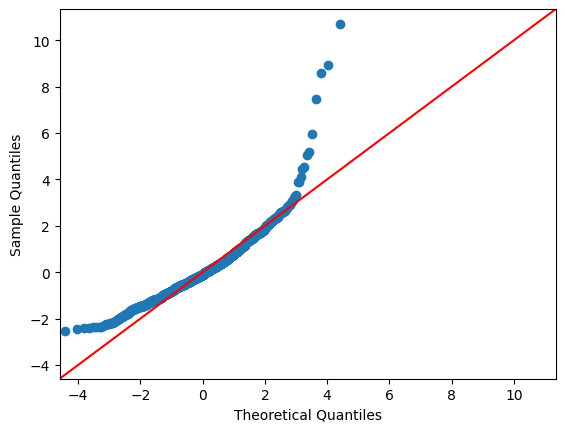

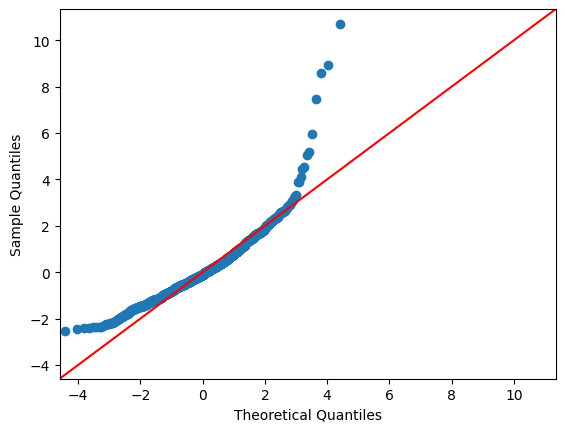

In [134]:
stats.probplot(duration, dist="norm", plot=plt)
plt.show()
sm.qqplot(duration, stats.t, fit=True, line='45') 



Shapiro test

In [135]:
res = stats.shapiro(duration)
print(res)
res.statistic # The value of this statistic tends to be high (close to 1) for samples drawn from a normal distribution.

ShapiroResult(statistic=0.906105101108551, pvalue=5.1749929866740065e-36)


0.906105101108551

### 2

Zavislost mezi popularity a danceability or speechiness?? Linearni regrese.<br>
H0: popularita nezalezi na speechiness <br>
Alternativni hypoteza: bla-bla

In [136]:
popularity = table['popularity']
speechiness = table['speechiness']
popularity.describe()
speechiness.describe()


count    2385.000000
mean       10.112369
std         9.520815
min         2.000000
25%         4.000000
50%         6.000000
75%        12.000000
max        58.000000
Name: speechiness, dtype: float64

Připravím si model lineární regrese, vynesu si data do grafu, proložím daty přímku a podívám se, jak data vypadají.

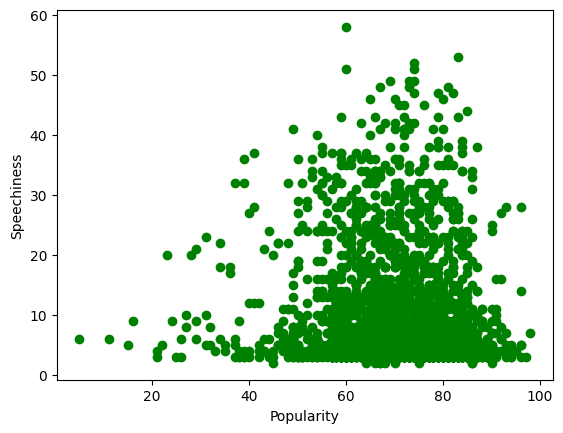

The linear model is: Y = 14.385 + -0.060586X


In [137]:
x = popularity.values.reshape(-1, 1)
y = speechiness.values.reshape(-1, 1)

reg = LinearRegression().fit(x, y)

#print("Coefficients: \n", reg.coef_)
#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
#print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

fig, ax = plt.subplots()
#ax.set_title('Example Graph')
ax.set_ylabel('Speechiness')
ax.set_xlabel('Popularity')

plt.scatter(x, y, color="green")

#plt.plot(x_test, y_pred, color="blue", linewidth=2)
plt.show()

reg.score(x, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

Poté spočítám průměr  **speechiness** a průměr popularity.

In [138]:
speechiness_mean = speechiness.mean()
popularity_mean = popularity.mean()
print(speechiness_mean, popularity_mean)

10.112368972746332 70.5266247379455


Spočítám a a b pro regresi.

In [139]:
suma = 0
a = 0
for i in range(len(speechiness)):
    a += (popularity[i] - popularity_mean)*(speechiness[i] - speechiness_mean)
    suma =  suma + (popularity[i]-popularity_mean)**2

a = a/suma
b = speechiness_mean - a*popularity_mean
print(a, b)

-0.06058611358770582 14.385303070077


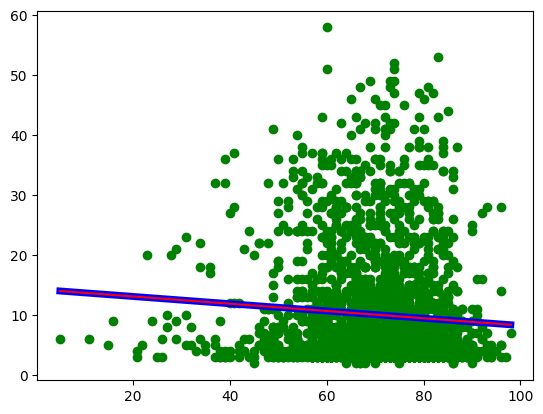

In [140]:
plt.scatter(x, y, color="green")

predictions = reg.predict(x)
#plt.plot(x_test, y_pred, color="blue", linewidth=2)
plt.plot(
    x,
    predictions,
    c='blue',
    linewidth=5
)
plt.plot(x, a*x+b, c='red')
plt.show()

Nejaky zaver ...  https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8 

In [141]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     12.65
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           0.000383
Time:                        22:03:19   Log-Likelihood:                -8751.9
No. Observations:                2385   AIC:                         1.751e+04
Df Residuals:                    2383   BIC:                         1.752e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3853      1.217     11.821      0.0

In [142]:
print(est2.pvalues[1]) #https://www.statology.org/statsmodels-linear-regression-p-value/

0.0003826317979757927


Reversed dependence: the less speechiness, the more popular

### 3
Zavislost mezi popularitou a dansability. H0 neni zacislost

The linear model is: Y = 68.686 + -0.023415X


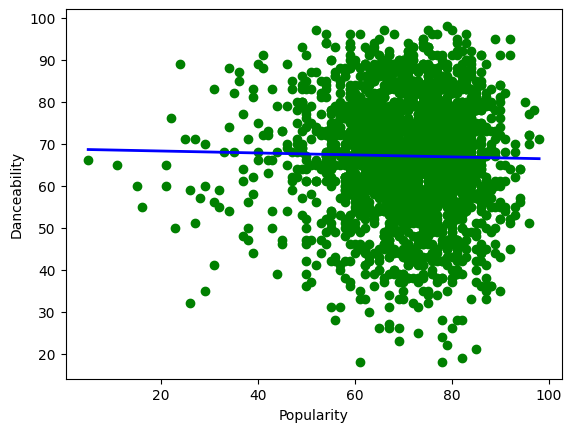

In [147]:
popularity = table['popularity']
dance = table['danceability']

x = popularity.values.reshape(-1, 1)
y = dance.values.reshape(-1, 1)

reg = LinearRegression().fit(x, y)


fig, ax = plt.subplots()
ax.set_ylabel('Danceability')
ax.set_xlabel('Popularity')

plt.scatter(x, y, color="green")

#plt.plot(x_test, y_pred, color="blue", linewidth=2)


reg.score(x, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

predictions = reg.predict(x)
#plt.plot(x_test, y_pred, color="blue", linewidth=2)
plt.plot(
    x,
    predictions,
    c='blue',
    linewidth=2
)
plt.show()


In [148]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
print(est2.pvalues[1]) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9056
Date:                Fri, 07 Jul 2023   Prob (F-statistic):              0.341
Time:                        22:25:02   Log-Likelihood:                -9629.0
No. Observations:                2385   AIC:                         1.926e+04
Df Residuals:                    2383   BIC:                         1.927e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.6862      1.758     39.073      0.0

neni linearni zavislost mezi tim

### 4 Tempo hudby
“Beats per minute” (or BPM) is self-explanatory: it indicates the number of beats in one minute. For instance, a tempo notated as 60 BPM would mean that a beat sounds exactly once per second. A 120 BPM tempo would be twice as fast, with two beats per second. <br>
Stredni hodnota bpm 00-09 roku a stredni hodnota bpm 10-19 roku<br>
H0: nelisi se
Alternativni: lisi se

Provedeme dvou vyberovy test. Priprava dat

[84, 112, 173, 105, 138, 88, 105, 148, 110, 172, 90, 100, 124, 146, 171, 139, 138, 114, 80, 174, 119, 95, 174, 90, 143, 105, 91, 131, 96, 100, 80, 128, 95, 96, 153, 119, 104, 162, 83, 115, 108, 125, 104, 150, 123, 87, 118, 151, 120, 171, 128, 133, 119, 117, 112, 120, 94, 91, 123, 148, 78, 113, 93, 122, 172, 119, 99, 117, 107, 99, 174, 87, 102, 105, 105, 125, 95, 95, 127, 186, 140, 99, 168, 125, 132, 79, 135, 180, 112, 104, 123, 115, 95, 97, 90, 86, 95, 85, 96, 117, 164, 162, 173, 155, 90, 118, 130, 80, 112, 119, 96, 120, 111, 123, 150, 108, 119, 135, 123, 172, 96, 93, 126, 120, 97, 95, 171, 105, 137, 168, 114, 181, 92, 93, 144, 98, 110, 100, 126, 100, 154, 91, 125, 101, 150, 137, 82, 183, 100, 137, 106, 130, 139, 93, 130, 104, 80, 122, 126, 126, 120, 89, 93, 80, 107, 135, 125, 116, 90, 160, 158, 102, 148, 122, 127, 161, 82, 110, 140, 136, 110, 120, 110, 80, 115, 148, 140, 74, 128, 197, 164, 83, 89, 145, 128, 139, 95, 103, 173, 100, 90, 106, 107, 118, 102, 112, 140, 86, 140, 113, 103, 1

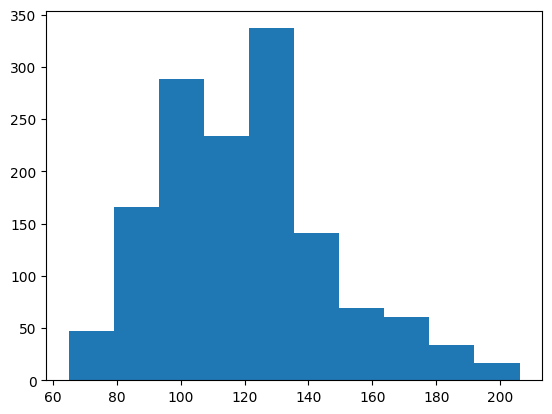

In [157]:
zeroes = []
tens = []
years = table['year']
bpms = table['bpm']
for i in range(len(years)):
    if years[i] > 2009:
        tens.append(bpms[i])
    else:
        if years[i] > 1999:
            zeroes.append(bpms[i])
print(zeroes)
print(tens)

result = stats.ttest_ind(zeroes, tens, equal_var=False, alternative='two-sided')
#result.confidence_interval(confidence_level=0.95)
print(result)
plt.hist(tens)
plt.show()